In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"verreljuantolukmana","key":"4de859c4079e31be19e2003ff0188129"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          22246        614  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1053         27  1.0              
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           2545         58  1.0              
darshanprabhu09/stock-prices-f

In [ ]:
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
! mkdir train

 99% 595M/598M [00:21<00:00, 28.7MB/s]
100% 598M/598M [00:21<00:00, 28.8MB/s]


In [ ]:
import sys
import os
import ssl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import tensorflow as tf
ssl._create_default_https_context = ssl._create_unverified_context
from skimage import io, filters, color
#segmentation
from skimage.transform import rescale, resize, downscale_local_mean, rotate
from keras import losses, models, optimizers
from keras.models import Sequential
from keras.layers import (Convolution2D, Dense, Dropout, GlobalAveragePooling2D,
                          GlobalMaxPool2D, Input, MaxPool2D, concatenate, Activation,
                          MaxPooling2D, Flatten, BatchNormalization, Conv2D, AveragePooling2D)
from keras.models import load_model
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
from keras.metrics import binary_accuracy
from sklearn.model_selection import StratifiedShuffleSplit
from keras import regularizers

!unzip "/content/cnmc-leukemia.zip" -d "cnmc"
# print(os.listdir("/content/train"))

Streaming output truncated to the last 5000 lines.
  inflating: cnmc/fold_1/fold_1/all/UID_51_44_3_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_44_4_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_44_5_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_44_6_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_44_7_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_44_8_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_46_1_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_46_2_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_46_3_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_46_4_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_46_5_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_46_6_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_46_7_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_47_1_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_47_2_all.bmp  
  inflating: cnmc/fold_1/fold_1/all/UID_51_47_3_all.bmp  
  inflating: cnmc/fol

In [ ]:
fftn = 100
fftm = 100

# data preparation, reading labels: sick - 'all' or 1, healthy - 'hem' or 0
def preproc_resize(img):
    new_img = img
    new_img = resize(img, (fftn, fftm, 3), anti_aliasing=True)
    return new_img

path = "/content/cnmc"
image_list = []
label = []
path_list = [path + '/fold_0/fold_0', path + '/fold_1/fold_1', path + '/fold_2/fold_2']

for i in path_list:
    dirr_all = i + '/' + 'all'
    dirr_hem = i + '/' + 'hem'

    listdir_all = os.listdir(dirr_all)
    listdir_hem = os.listdir(dirr_hem)

    for j in listdir_all:
        image_list.append(dirr_all + '/' + j)
        label.append(1)
    for j in listdir_hem:
        image_list.append(dirr_hem + '/' + j)
        label.append(0)

df = pd.DataFrame(list(zip(image_list, label)), columns=['Img', 'label'])

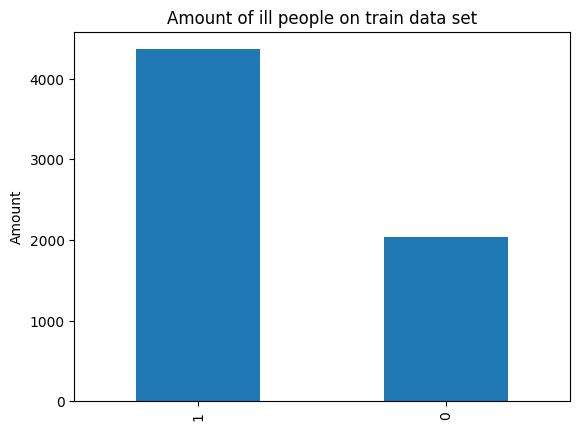

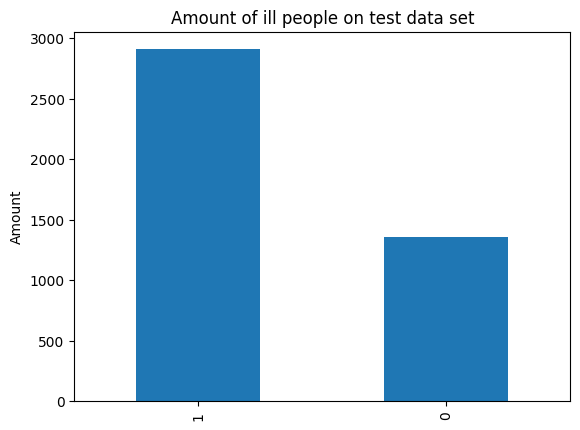

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

for train_index, test_index in split.split(df, df["label"]):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]

xTrain = np.empty(shape=(len(strat_train), fftn, fftm, 3))
xTest = np.empty(shape=(len(strat_test), fftn, fftm, 3))

yTrain = np.empty(shape=(len(strat_train), 2))
yTest = np.empty(shape=(len(strat_test), 2))

train_count = 0
test_count = 0

for i in list(strat_train.index):
    img = preproc_resize(io.imread(strat_train['Img'][i]))
    xTrain[train_count, ] = img
    if strat_train['label'][i] == 1:
        yTrain[train_count, ] = [0, 1]
    if strat_train['label'][i] == 0:
        yTrain[train_count, ] = [1, 0]
    train_count += 1

plt.title('Amount of ill people on train data set')
plt.ylabel('Amount')
strat_train['label'].value_counts().plot(kind='bar')
plt.show()

for i in list(strat_test.index):
    img = preproc_resize(io.imread(strat_test['Img'][i]))
    xTest[test_count,] = img
    if strat_test['label'][i] == 1:
        yTest[test_count,] = [0, 1]
    if strat_test['label'][i] == 0:
        yTest[test_count,] = [1, 0]
    test_count += 1


plt.title('Amount of ill people on test data set')
plt.ylabel('Amount')
strat_test['label'].value_counts().plot(kind='bar')
plt.show()

ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

feature_extractor = ResNet50(weights='imagenet',
                             input_shape=(100, 100, 3),
                             include_top=False)

feature_extractor.trainable = False

# Set the input layer
input_ = tf.keras.Input(shape=(100, 100, 3))
# Set the feature extractor layer
x = feature_extractor(input_, training=False)

# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(2, activation='sigmoid')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
history = model.fit(xTrain, yTrain, epochs=35, verbose=2, validation_data=(xTest, yTest), validation_split=0.1)
score = model.evaluate(xTest, yTest, verbose=0)
print("Accuracy: %f" % score[1])
yPred = model.predict(xTest)

Epoch 1/35
200/200 - 16s - loss: 0.6229 - accuracy: 0.6821 - val_loss: 0.6193 - val_accuracy: 0.6821 - 16s/epoch - 79ms/step
Epoch 2/35
200/200 - 11s - loss: 0.6080 - accuracy: 0.6821 - val_loss: 0.6077 - val_accuracy: 0.6821 - 11s/epoch - 53ms/step
Epoch 3/35
200/200 - 9s - loss: 0.5973 - accuracy: 0.6826 - val_loss: 0.5881 - val_accuracy: 0.6821 - 9s/epoch - 46ms/step
Epoch 4/35
200/200 - 11s - loss: 0.5856 - accuracy: 0.6823 - val_loss: 0.5801 - val_accuracy: 0.6821 - 11s/epoch - 53ms/step
Epoch 5/35
200/200 - 11s - loss: 0.5763 - accuracy: 0.6867 - val_loss: 0.5680 - val_accuracy: 0.6821 - 11s/epoch - 53ms/step
Epoch 6/35
200/200 - 11s - loss: 0.5700 - accuracy: 0.7003 - val_loss: 0.5664 - val_accuracy: 0.6821 - 11s/epoch - 53ms/step
Epoch 7/35
200/200 - 11s - loss: 0.5658 - accuracy: 0.6962 - val_loss: 0.5536 - val_accuracy: 0.6835 - 11s/epoch - 53ms/step
Epoch 8/35
200/200 - 9s - loss: 0.5553 - accuracy: 0.6978 - val_loss: 0.5495 - val_accuracy: 0.7304 - 9s/epoch - 45ms/step
Epoc

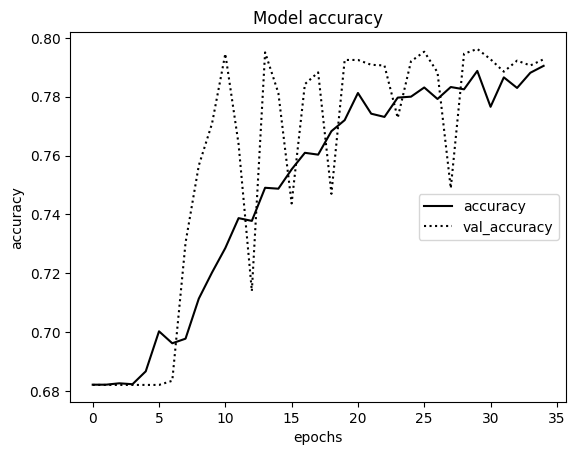

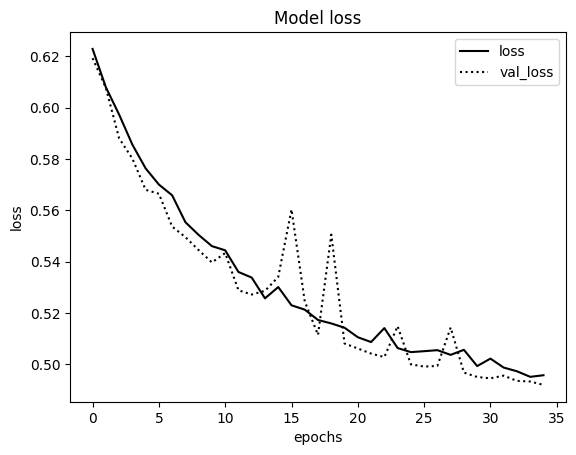

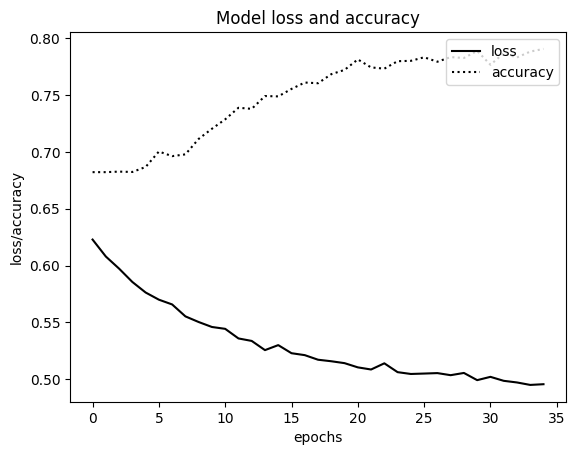

In [ ]:
def visualise(history):

    # summarize history for accuracy
    plt.plot(history.history['accuracy'], 'k-')
    plt.plot(history.history['val_accuracy'], 'k:')
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['accuracy', 'val_accuracy'], loc='center right')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'], 'k-')
    plt.plot(history.history['val_loss'], 'k:')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['loss', 'val_loss'], loc='upper right')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'], 'k')
    plt.plot(history.history['accuracy'], 'k:')
    plt.title('Model loss and accuracy')
    plt.ylabel('loss/accuracy')
    plt.xlabel('epochs')
    plt.legend(['loss', 'accuracy'], loc='upper right')
    plt.show()

# predict class for new image

def pred_image(model, image):
    img = io.imread(image)
    new_img = resize(img, (fftn, fftm, 3), anti_aliasing=True)
    x = np.empty(shape=(1, fftn, fftm, 3))
    x[0,] = new_img
    yPred = model.predict(x)
    return print('yPred', yPred)

visualise(history)

VGG-16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
vgg = VGG16(input_shape = (100,100,3), weights = 'imagenet', include_top = False)
for layer in vgg.layers:
 layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(2, activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
history = model.fit(xTrain, yTrain, epochs=35, verbose=2, validation_data=(xTest, yTest), validation_split=0.1)
score = model.evaluate(xTest, yTest, verbose=0)
print("Accuracy: %f" % score[1])
yPred = model.predict(xTest)

Epoch 1/35
200/200 - 13s - loss: 0.4826 - accuracy: 0.7874 - val_loss: 0.4413 - val_accuracy: 0.8049 - 13s/epoch - 64ms/step
Epoch 2/35
200/200 - 10s - loss: 0.4481 - accuracy: 0.8057 - val_loss: 0.4589 - val_accuracy: 0.8007 - 10s/epoch - 51ms/step
Epoch 3/35
200/200 - 11s - loss: 0.4408 - accuracy: 0.8088 - val_loss: 0.4577 - val_accuracy: 0.7988 - 11s/epoch - 57ms/step
Epoch 4/35
200/200 - 10s - loss: 0.4328 - accuracy: 0.8102 - val_loss: 0.4321 - val_accuracy: 0.8117 - 10s/epoch - 51ms/step
Epoch 5/35
200/200 - 10s - loss: 0.4280 - accuracy: 0.8143 - val_loss: 0.4457 - val_accuracy: 0.8042 - 10s/epoch - 51ms/step
Epoch 6/35
200/200 - 11s - loss: 0.4219 - accuracy: 0.8180 - val_loss: 0.4435 - val_accuracy: 0.8113 - 11s/epoch - 56ms/step
Epoch 7/35
200/200 - 11s - loss: 0.4173 - accuracy: 0.8218 - val_loss: 0.4409 - val_accuracy: 0.8068 - 11s/epoch - 56ms/step
Epoch 8/35
200/200 - 10s - loss: 0.4111 - accuracy: 0.8243 - val_loss: 0.4389 - val_accuracy: 0.8152 - 10s/epoch - 50ms/step


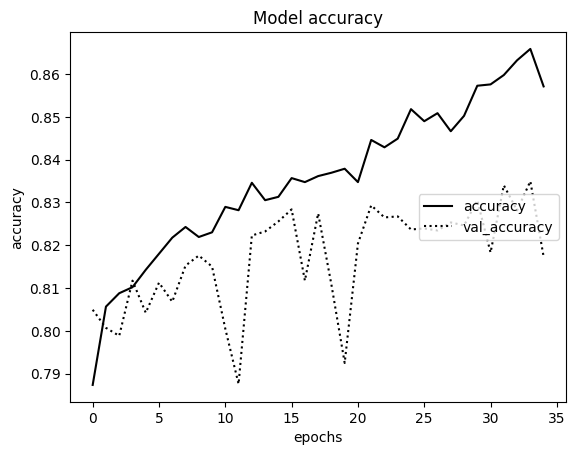

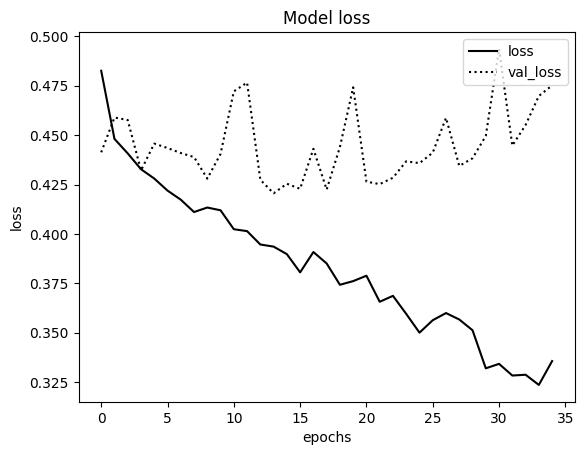

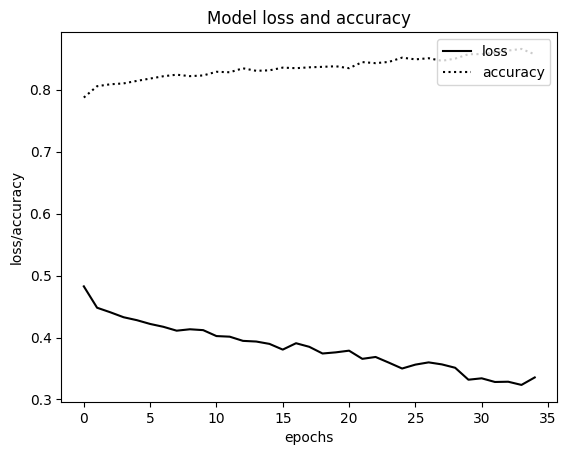

In [ ]:
def visualise(history):

    # summarize history for accuracy
    plt.plot(history.history['accuracy'], 'k-')
    plt.plot(history.history['val_accuracy'], 'k:')
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['accuracy', 'val_accuracy'], loc='center right')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'], 'k-')
    plt.plot(history.history['val_loss'], 'k:')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['loss', 'val_loss'], loc='upper right')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'], 'k')
    plt.plot(history.history['accuracy'], 'k:')
    plt.title('Model loss and accuracy')
    plt.ylabel('loss/accuracy')
    plt.xlabel('epochs')
    plt.legend(['loss', 'accuracy'], loc='upper right')
    plt.show()

# predict class for new image

def pred_image(model, image):
    img = io.imread(image)
    new_img = resize(img, (fftn, fftm, 3), anti_aliasing=True)
    x = np.empty(shape=(1, fftn, fftm, 3))
    x[0,] = new_img
    yPred = model.predict(x)
    return print('yPred', yPred)

visualise(history)

VGG versi kaggle

In [ ]:
# weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
from tensorflow.keras.applications.vgg16 import VGG16
model = Sequential()
model.add(VGG16(include_top = False, weights = "imagenet", input_shape = (100,100,3)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(xTrain, yTrain, epochs=35, verbose=2, validation_data=(xTest, yTest), validation_split=0.1)
score = model.evaluate(xTest, yTest, verbose=0)
print("Accuracy: %f" % score[1])
yPred = model.predict(xTest)

Epoch 1/35
200/200 - 27s - loss: 0.6026 - accuracy: 0.7034 - val_loss: 0.4577 - val_accuracy: 0.7925 - 27s/epoch - 135ms/step
Epoch 2/35
200/200 - 23s - loss: 0.4606 - accuracy: 0.8002 - val_loss: 0.4476 - val_accuracy: 0.8049 - 23s/epoch - 114ms/step
Epoch 3/35
200/200 - 24s - loss: 0.4447 - accuracy: 0.8041 - val_loss: 0.4489 - val_accuracy: 0.7909 - 24s/epoch - 120ms/step
Epoch 4/35
200/200 - 24s - loss: 0.4316 - accuracy: 0.8169 - val_loss: 0.4250 - val_accuracy: 0.8176 - 24s/epoch - 121ms/step
Epoch 5/35
200/200 - 24s - loss: 0.4199 - accuracy: 0.8210 - val_loss: 0.4422 - val_accuracy: 0.8096 - 24s/epoch - 122ms/step
Epoch 6/35
200/200 - 24s - loss: 0.4081 - accuracy: 0.8288 - val_loss: 0.4005 - val_accuracy: 0.8335 - 24s/epoch - 122ms/step
Epoch 7/35
200/200 - 24s - loss: 0.3979 - accuracy: 0.8326 - val_loss: 0.4186 - val_accuracy: 0.8307 - 24s/epoch - 122ms/step
Epoch 8/35
200/200 - 24s - loss: 0.3895 - accuracy: 0.8349 - val_loss: 0.3861 - val_accuracy: 0.8436 - 24s/epoch - 118

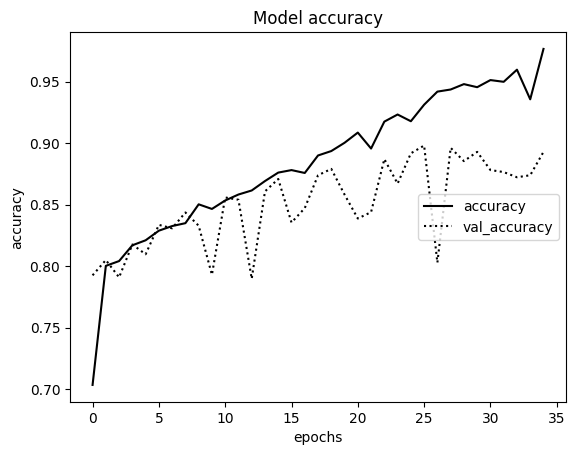

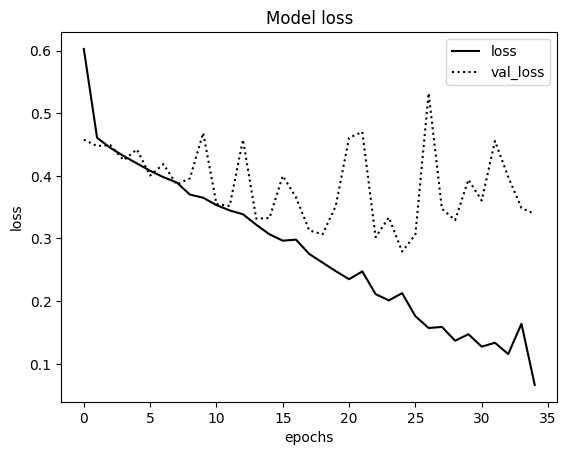

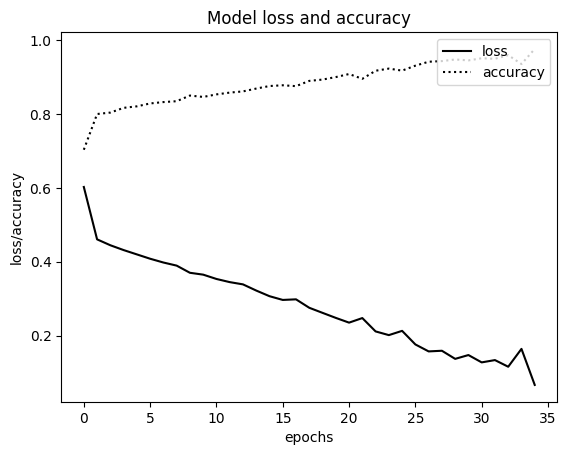

In [ ]:
def visualise(history):

    # summarize history for accuracy
    plt.plot(history.history['accuracy'], 'k-')
    plt.plot(history.history['val_accuracy'], 'k:')
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['accuracy', 'val_accuracy'], loc='center right')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'], 'k-')
    plt.plot(history.history['val_loss'], 'k:')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['loss', 'val_loss'], loc='upper right')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'], 'k')
    plt.plot(history.history['accuracy'], 'k:')
    plt.title('Model loss and accuracy')
    plt.ylabel('loss/accuracy')
    plt.xlabel('epochs')
    plt.legend(['loss', 'accuracy'], loc='upper right')
    plt.show()

# predict class for new image

def pred_image(model, image):
    img = io.imread(image)
    new_img = resize(img, (fftn, fftm, 3), anti_aliasing=True)
    x = np.empty(shape=(1, fftn, fftm, 3))
    x[0,] = new_img
    yPred = model.predict(x)
    return print('yPred', yPred)

visualise(history)

CNN

In [ ]:
# neural network model
kernel_initializer = 'lecun_uniform'
bias_initializer = 'lecun_uniform'
kernel_regularizer = None
activation = "relu"

batch_size = 8
data_rows = fftn
data_cols = fftm
input_shape = (data_rows, data_cols, 3)

# learning epochs
nb_epoch = 35
# learning rate
alpha_zero = 0.001

model = models.Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape, data_format="channels_last", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, kernel_regularizer=kernel_regularizer))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2), input_shape=input_shape, data_format="channels_last", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, kernel_regularizer=kernel_regularizer))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (2, 2), input_shape=input_shape, data_format="channels_last", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, kernel_regularizer=kernel_regularizer))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (2, 2), input_shape=input_shape, data_format="channels_last", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, kernel_regularizer=kernel_regularizer))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (2, 2), input_shape=input_shape, data_format="channels_last", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, kernel_regularizer=kernel_regularizer))
model.add(Activation(activation))
model.add(Dropout(0.8))

# adding connected layers
model.add(Flatten())
model.add(Dense(256, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
model.add(Activation(activation))
model.add(Dropout(0.8))
model.add(Dense(128, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
model.add(Activation(activation))
model.add(Dropout(0.8))
model.add(Dense(64, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
model.add(Activation(activation))
model.add(Dropout(0.6))
model.add(Dense(32, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss=["binary_crossentropy"], optimizer="adam", metrics=["accuracy"])
history = model.fit(xTrain, yTrain, epochs=nb_epoch, verbose=2, validation_data=(xTest, yTest), validation_split=0.1)

score = model.evaluate(xTest, yTest, verbose=0)
print("Accuracy: %f" % score[1])
yPred = model.predict(xTest)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 99, 99, 32)        416       
                                                                 
 activation_9 (Activation)   (None, 99, 99, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        8256      
                                                                 
 activation_10 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                  

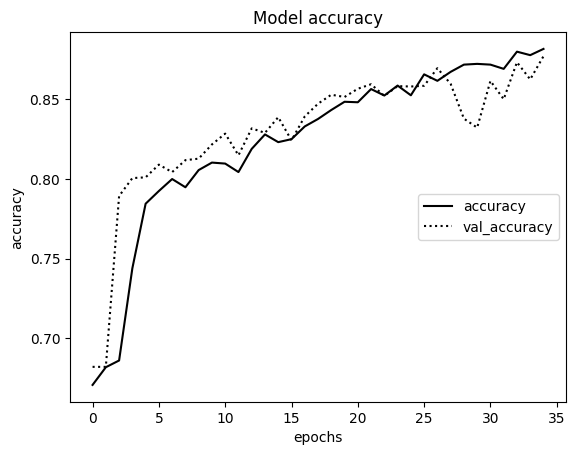

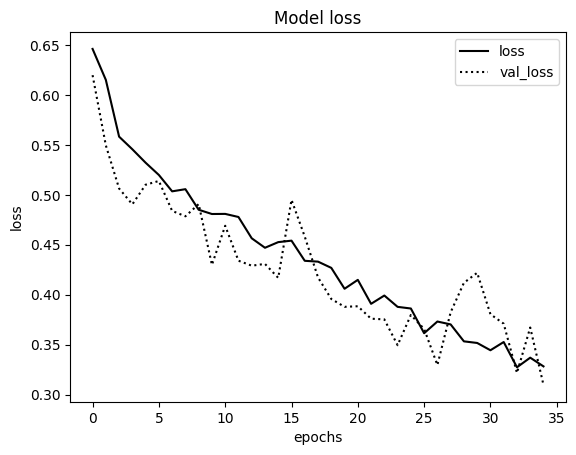

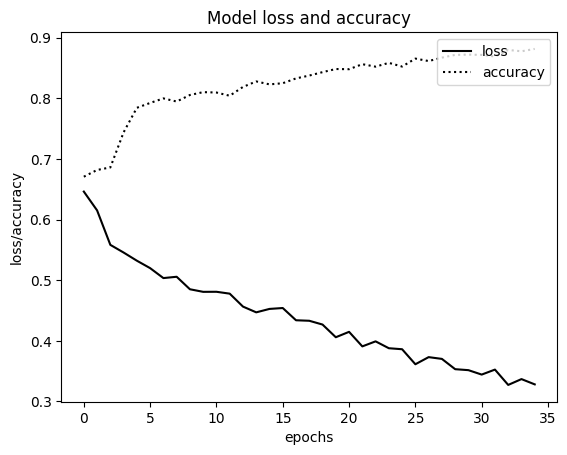

In [ ]:
def visualise(history):

    # summarize history for accuracy
    plt.plot(history.history['accuracy'], 'k-')
    plt.plot(history.history['val_accuracy'], 'k:')
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['accuracy', 'val_accuracy'], loc='center right')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'], 'k-')
    plt.plot(history.history['val_loss'], 'k:')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['loss', 'val_loss'], loc='upper right')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'], 'k')
    plt.plot(history.history['accuracy'], 'k:')
    plt.title('Model loss and accuracy')
    plt.ylabel('loss/accuracy')
    plt.xlabel('epochs')
    plt.legend(['loss', 'accuracy'], loc='upper right')
    plt.show()

# predict class for new image

def pred_image(model, image):
    img = io.imread(image)
    new_img = resize(img, (fftn, fftm, 3), anti_aliasing=True)
    x = np.empty(shape=(1, fftn, fftm, 3))
    x[0,] = new_img
    yPred = model.predict(x)
    return print('yPred', yPred)

visualise(history)